# PA 2 - CS6510 (CS17MTECH11028)
# Question 1 - PCA & t-SNE

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import make_swiss_roll
%matplotlib inline

## PCA Implementation

In [2]:
class PrincipalComponentAnalysis(object):
    
    def __init__( self, n_components = 1 ):
        self.n_components = n_components
        
    def fit_transform( self, X ):
        # Get the reduced form of input data
        # X -> n*d
        # Subtract mean from all features of the input dataset
        for f in range(X.shape[1]):
            mean = np.mean(X[:,f])
            X[:,f] = X[:,f] - mean
            
        # Build the covariance matrix
        self.cov = np.dot( X.transpose(), X)/X.shape[0]  # cov = d*d
        
        # Get the eigen vectors from numpy library
        w, _, _     = np.linalg.svd( self.cov )  # w = d*d for k components d*k

        # Return wX using only k eigen vectors
        return np.dot(X, w[:, :self.n_components])   # return (n*d) x (d*k) => n*k

## Load Iris dataset, apply PCA and t-SNE

In [3]:
dataset = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None)

X = dataset[[0,1,2,3]].values
y = dataset[4].values
print(np.unique(y, return_counts = True))

# Applying PCA Implementation
pca = PrincipalComponentAnalysis(n_components = 2)
X_pca2 = pca.fit_transform( X )
print(X_pca2.shape)

# Applying t-SNE sklearn
tsne = TSNE(n_components=2, random_state=0)
X_tsne2 = tsne.fit_transform(X)
print(X_tsne2.shape)

(array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object), array([50, 50, 50]))
(150, 2)
(150, 2)


## Plotting Iris PCA and PCA v/s t-SNE for Iris dataset

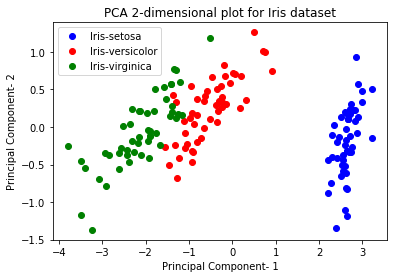

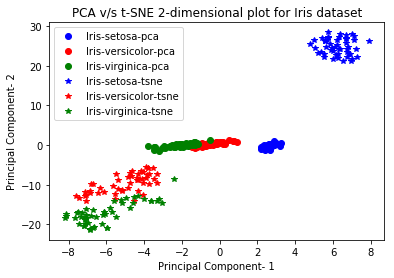

In [4]:
# PCA Iris plot
plt.figure()
plt.plot(X_pca2[y=='Iris-setosa'][:,0], X_pca2[y=='Iris-setosa'][:,1], 'o', color = 'b', label = 'Iris-setosa')
plt.plot(X_pca2[y=='Iris-versicolor'][:,0], X_pca2[y=='Iris-versicolor'][:,1], 'o', color = 'r', label = 'Iris-versicolor')
plt.plot(X_pca2[y=='Iris-virginica'][:,0], X_pca2[y=='Iris-virginica'][:,1], 'o', color = 'g', label = 'Iris-virginica')
plt.xlabel('Principal Component- 1')
plt.ylabel('Principal Component- 2')
plt.title('PCA 2-dimensional plot for Iris dataset')
plt.legend()

# PCA v/s t-SNE Iris Plot
plt.figure()
plt.plot(X_pca2[y=='Iris-setosa'][:,0], X_pca2[y=='Iris-setosa'][:,1], 'o', color = 'b', label = 'Iris-setosa-pca')
plt.plot(X_pca2[y=='Iris-versicolor'][:,0], X_pca2[y=='Iris-versicolor'][:,1], 'o', color = 'r', label = 'Iris-versicolor-pca')
plt.plot(X_pca2[y=='Iris-virginica'][:,0], X_pca2[y=='Iris-virginica'][:,1], 'o', color = 'g', label = 'Iris-virginica-pca')

plt.plot(X_tsne2[y=='Iris-setosa'][:,0], X_tsne2[y=='Iris-setosa'][:,1], '*', color = 'b', label = 'Iris-setosa-tsne')
plt.plot(X_tsne2[y=='Iris-versicolor'][:,0], X_tsne2[y=='Iris-versicolor'][:,1], '*', color = 'r', label = 'Iris-versicolor-tsne')
plt.plot(X_tsne2[y=='Iris-virginica'][:,0], X_tsne2[y=='Iris-virginica'][:,1], '*', color = 'g', label = 'Iris-virginica-tsne')
plt.legend()

plt.xlabel('Principal Component- 1')
plt.ylabel('Principal Component- 2')
plt.title('PCA v/s t-SNE 2-dimensional plot for Iris dataset')
plt.legend()

### Observations from above plots

1. PCA Plot on Iris Dataset:<br>
    - PCA clearly separates the 3 classes of Iris dataset.<br>
    - It also gives a linearly separable output when two principal components are used.<br>
    - This tells us that a good algorithm can classify on this dataset well.<br>
 <br>
2. PCA vs t-SNE on Iris Dataset:<br>
    - The points plotted by PCA are shown by 'o' and those by t-SNE are shown by '*'. Same colors are maintained for classes.
    - Both algorithms segregate the points of different classes well.
    - The values of data points by t-SNE have higher range (min ~ -25, max ~30).


## Load Swiss Roll dataset, apply PCA and t-SNE

In [5]:
X_swiss, y_swiss = make_swiss_roll(n_samples = 2000)
print(X_swiss.shape)

# Apply PCA Implementation
pca = PrincipalComponentAnalysis(n_components = 2)
X__swiss_pca2 = pca.fit_transform( X_swiss )
print(X__swiss_pca2.shape)

# Apply sklearn t-SNE
tsne = TSNE(n_components=2, random_state=0)
X_swiss_tsne2 = tsne.fit_transform(X_swiss) 
print(X_swiss_tsne2.shape)

(2000, 3)
(2000, 2)
(2000, 2)


## Plot PCA v/s t-SNE for Swiss Roll dataset

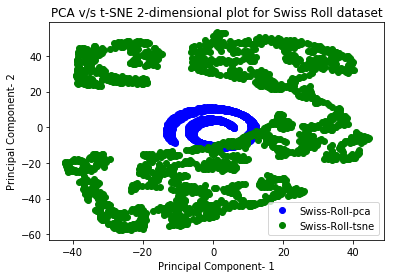

In [6]:
plt.figure()
plt.plot(X__swiss_pca2[:,0], X__swiss_pca2[:,1], 'o', color = 'b', label = 'Swiss-Roll-pca')
plt.plot(X_swiss_tsne2[:,0], X_swiss_tsne2[:,1], 'o', color = 'g', label = 'Swiss-Roll-tsne')
plt.legend()
plt.xlabel('Principal Component- 1')
plt.ylabel('Principal Component- 2')
plt.title('PCA v/s t-SNE 2-dimensional plot for Swiss Roll dataset')

### Observations from above plot

1. PCA v/s t-SNE on Swiss Roll dataset:<br>
    - PCA maintains the roll shape of the dataset in 2 dimenesions.
    - The shape speciality of dataset is lost after t-SNE transformation.
    - This is because, t-SNE only worries about every points distance from its neighbor and it uses the non-linear path to measure distances between points. That is why it shows the points on tips of roll to be far away.
    - PCA shows these points closer as it fails to find non-linear path.